In [1]:
import pandas as pd

# Загружаем lectures и знакомимся с составом данных
lectures = pd.read_csv('lectures.csv')
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [2]:
lectures.tail()

,lecture_id,tag,part,type_of
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept
417,32736,82,3,concept


In [3]:
# Загружаем questions и знакомимся с составом данных
questions = pd.read_csv('questions.csv')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [4]:
questions.tail()

,question_id,bundle_id,correct_answer,part,tags
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125
13522,13522,13522,3,5,55


In [5]:
# Загружаем train и знакомимся с составом данных
train = pd.read_csv('train.csv')
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [6]:
train.tail()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True
101230331,101230331,428692118,2147482888,7995,0,26,3,1,29000.0,True


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [8]:
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [9]:
from pandas import DataFrame

# Функция для визуализации пустых значений по каждой колонке
def analyze_missing_values(df: DataFrame):
    missing_count = df.isnull().sum()
    missing_percentage = round((missing_count / len(df)) * 100, 2)
    missing_df = pd.DataFrame({
        'Столбцы': missing_count.index,
        'Кол-во пропущенных строк': missing_count.values,
        '% пропущенных значений': missing_percentage
    })
    
    missing_df = missing_df[missing_df['Кол-во пропущенных строк'] > 0].reset_index(drop=True)
    
    return missing_df

# Проверяем пустые данные в train
missing_data = analyze_missing_values(train)
missing_data

,Столбцы,Кол-во пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,2351538,2.32
1,prior_question_had_explanation,392506,0.39


In [10]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [11]:
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [12]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [13]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [14]:
# Объединяем наши 3 датасета в один по id и типу контента
lectures_adapt = lectures.copy()
lectures_adapt['content_type_id'] = 1
lectures_adapt.rename(columns={'lecture_id': 'content_id', 'tag': 'lecture_tag', 'part': 'lecture_part', 'type_of': 'lecture_type'}, inplace=True)

train_full = pd.merge(train, lectures_adapt, 'left', on=['content_type_id', 'content_id'])

questions_adapt = questions.copy()
questions_adapt['content_type_id'] = 0
questions_adapt.rename(columns={'question_id': 'content_id', 'bundle_id': 'question_bundle_id', 'part': 'question_part', 'tags': 'question_tags'}, inplace=True)

train_full = pd.merge(train_full, questions_adapt, 'left', on=['content_type_id', 'content_id'])
train_full.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_tag,lecture_part,lecture_type,question_bundle_id,correct_answer,question_part,question_tags
0,0,0,115,5692,0,1,3,1,NaN,NaN,NaN,NaN,NaN,5692.0,3.0,5.0,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,NaN,NaN,NaN,5716.0,2.0,5.0,168
2,2,118363,115,128,0,0,0,1,55000.0,False,NaN,NaN,NaN,128.0,0.0,1.0,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,NaN,NaN,NaN,7860.0,0.0,1.0,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,NaN,NaN,NaN,7922.0,1.0,1.0,131 149 92


In [15]:
train_full.tail()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_tag,lecture_part,lecture_type,question_bundle_id,correct_answer,question_part,question_tags
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True,NaN,NaN,NaN,3586.0,0.0,5.0,8
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True,NaN,NaN,NaN,6341.0,3.0,5.0,60
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True,NaN,NaN,NaN,4212.0,3.0,5.0,95
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True,NaN,NaN,NaN,6343.0,0.0,5.0,60
101230331,101230331,428692118,2147482888,7995,0,26,3,1,29000.0,True,NaN,NaN,NaN,7995.0,3.0,5.0,80


In [16]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
 10  lecture_tag                     float64
 11  lecture_part                    float64
 12  lecture_type                    object 
 13  question_bundle_id              float64
 14  correct_answer                  float64
 15  question_part                   float64
 16  question_tags                   object 
dtypes: float64(6), int64(8)

In [17]:
train_full.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,lecture_tag,lecture_part,question_bundle_id,correct_answer,question_part
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07,1.959032e+06,1.959032e+06,9.927130e+07,9.927130e+07,9.927130e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04,9.109704e+01,4.083047e+00,4.993985e+03,1.441169e+00,4.083499e+00
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04,5.438902e+01,1.675365e+00,3.288847e+03,1.153845e+00,1.672031e+00
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04,4.700000e+01,2.000000e+00,2.015000e+03,0.000000e+00,2.000000e+00
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04,8.500000e+01,5.000000e+00,4.984000e+03,1.000000e+00,5.000000e+00
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04,1.390000e+02,5.000000e+00,7.216000e+03,3.000000e+00,5.000000e+00
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05,1.870000e+02,7.000000e+00,1.352200e+04,3.000000e+00,7.000000e+00


In [ ]:
# Убеждаемся, что в столбцах с типом float на самом деле все значения целые (без дробной части)
def has_fractional_part(x):
    return isinstance(x, float) and pd.notna(x) and (x % 1 != 0)

float_features = train_full.select_dtypes(include=['float']).columns.tolist()
df_float = train_full[float_features].copy()
mask = df_float.map(has_fractional_part)
filtered_df = df_float[mask.any(axis=1)]

# Если все значения без дробной части, то filtered_df будет пустым
filtered_df.head()

In [19]:
# Анализируем пустые данные в train_full
missing_data = analyze_missing_values(train_full)
missing_data



,Столбцы,Кол-во пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,2351538,2.32
1,prior_question_had_explanation,392506,0.39
2,lecture_tag,99271300,98.06
3,lecture_part,99271300,98.06
4,lecture_type,99271300,98.06
5,question_bundle_id,1959032,1.94
6,correct_answer,1959032,1.94
7,question_part,1959032,1.94
8,question_tags,1959033,1.94


In [20]:
# Смотрим данные по отдельному пользователю
train_full.sort_values(['user_id', 'timestamp'])
train_full[train_full['user_id'] == 2746].head(100)


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_tag,lecture_part,lecture_type,question_bundle_id,correct_answer,question_part,question_tags
76,76,0,2746,5273,0,0,1,0,NaN,NaN,NaN,NaN,NaN,5273.0,3.0,5.0,45
77,77,21592,2746,758,0,1,0,0,28000.0,False,NaN,NaN,NaN,758.0,3.0,2.0,62 155 119 38 81
78,78,49069,2746,5976,0,2,3,0,17000.0,False,NaN,NaN,NaN,5976.0,2.0,5.0,152
79,79,72254,2746,236,0,3,3,1,24000.0,False,NaN,NaN,NaN,236.0,3.0,2.0,129 17 56 38 102
80,80,91945,2746,404,0,4,3,0,20000.0,False,NaN,NaN,NaN,404.0,0.0,2.0,138 41 38 102
81,81,111621,2746,382,0,5,0,1,16000.0,False,NaN,NaN,NaN,382.0,0.0,2.0,90 100 92 102
82,82,134341,2746,405,0,6,1,1,16000.0,False,NaN,NaN,NaN,405.0,1.0,2.0,17 56 38 92
83,83,234605,2746,873,0,7,3,1,19000.0,False,NaN,NaN,NaN,873.0,3.0,2.0,62 148 32 92 102
84,84,283894,2746,531,0,8,0,1,18000.0,True,NaN,NaN,NaN,531.0,0.0,2.0,143 71 38 29
85,85,328640,2746,775,0,9,3,0,18000.0,True,NaN,NaN,NaN,775.0,0.0,2.0,129 143 176 38 102


In [22]:
# Подберём 2 пользователя у которых 3 лекции и общее количество строк небольшое. И лекции не должны быть после ответа на все вопросы. 
train_full['count'] = 1
df = train_full[['user_id', 'content_type_id', 'count']].copy()
user_lecture = df.groupby('user_id').sum()
df = user_lecture[user_lecture['content_type_id'] == 3].sort_values('count')
df.head(10)

,content_type_id,count
user_id,,
1345132507,3,16
352568007,3,18
2095365914,3,20
385528363,3,21
1211193916,3,23
697272214,3,24
832164855,3,25
2042923470,3,25
824103541,3,25


In [23]:
# Эта 2 пользователя, на которых буду тестировать свои функции трансформации данных
test_users = train_full[train_full['user_id'].isin([2095365914, 385528363])]
test_users.head(41)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_tag,lecture_part,lecture_type,question_bundle_id,correct_answer,question_part,question_tags,count
17983301,17983301,0,385528363,6227,0,0,1,1,NaN,NaN,NaN,NaN,NaN,6227.0,1.0,5.0,8,1
17983302,17983302,16958,385528363,3762,0,1,2,1,5000.0,False,NaN,NaN,NaN,3762.0,2.0,5.0,152,1
17983303,17983303,27208,385528363,6381,0,2,0,1,12000.0,False,NaN,NaN,NaN,6381.0,0.0,5.0,4,1
17983304,17983304,46153,385528363,366,0,3,3,1,6000.0,False,NaN,NaN,NaN,366.0,3.0,2.0,143 30 38 92,1
17983305,17983305,64810,385528363,371,0,4,3,1,15000.0,False,NaN,NaN,NaN,371.0,3.0,2.0,143 140 69 38 102,1
17983306,17983306,75785,385528363,6102,0,5,0,0,15000.0,False,NaN,NaN,NaN,6102.0,2.0,5.0,133,1
17983307,17983307,85751,385528363,5738,0,6,3,0,7000.0,False,NaN,NaN,NaN,5738.0,2.0,5.0,8,1
17983308,17983308,108952,385528363,4254,0,7,2,0,6000.0,False,NaN,NaN,NaN,4254.0,1.0,5.0,96,1
17983309,17983309,119459,385528363,6104,0,8,1,1,20000.0,False,NaN,NaN,NaN,6104.0,1.0,5.0,53,1
17983310,17983310,138956,385528363,6659,0,9,1,0,7000.0,False,NaN,NaN,NaN,6659.0,3.0,5.0,53,1


**Основная суть задумки:** <br>
У вопроса есть список тегов. <br>
И пользователь мог изучить одну или несколько лекций с тегами совпадающими с тегами в вопросе.<br>
То есть отвечать на вопрос он будет уже после изучения части теории по нему.<br>
Поскольку у вопросов может быть несколько тегов, то будем делить кол-во изученных лекций с определённым тегом на общее количество тегов в вопросе 


In [24]:
# Отлаживаем формулу calc_lecture_percentage на небольшом датасете
# def calc_lecture_percentage(row, dfl):
#     lecture_before = dfl[(dfl['user_id'] == row['user_id']) & (dfl['timestamp'] < row['timestamp'])]['lecture_tag'].tolist()
#     user_tags = set([int(x) for x in lecture_before if pd.notna(x)])
#     question_tags = set([int(x) for x in str(row['question_tags']).split()]) if pd.notna(row['question_tags']) else set()
#     intersection_tags_count = len(question_tags.intersection(user_tags))
#     
#     return round(intersection_tags_count / len(question_tags), 2) if len(question_tags) else 0
# 
# df = pd.DataFrame(test_users)
# df['lecture_percentage'] = df[['user_id', 'timestamp', 'question_tags']].apply(lambda x: calc_lecture_percentage(x, df), axis=1)
# df.head(41)

# Код выше очень медленно работает на всём датасете, поэтому оптимизируем его:
def calculate_lecture_percentage(df: DataFrame):
    # Сортируем DataFrame по user_id и timestamp
    df = df.sort_values(['user_id', 'timestamp']).reset_index(drop=True)
    # Инициализируем список для хранения процентов
    lecture_percentages = []
    # Инициализируем словарь для хранения просмотренных lecture_tags для каждого пользователя
    lecture_tags_seen = {}
    
    # Итерируемся по строкам DataFrame
    for idx, row in df.iterrows():
        user_id = row['user_id']
        # Инициализируем множество для пользователя, если его еще нет
        if user_id not in lecture_tags_seen:
            lecture_tags_seen[user_id] = set()
        
        # Обрабатываем question_tags
        if pd.notna(row['question_tags']):
            question_tags = set(map(int, str(row['question_tags']).split()))
            intersection_tags_count = len(question_tags.intersection(lecture_tags_seen[user_id]))
            lecture_percentage = round(intersection_tags_count / len(question_tags), 2) if question_tags else 0
        else:
            lecture_percentage = 0
        lecture_percentages.append(lecture_percentage)
        
        # Обновляем lecture_tags_seen, если есть lecture_tag
        if pd.notna(row['lecture_tag']):
            lecture_tags_seen[user_id].add(int(row['lecture_tag']))
    
    # Добавляем вычисленные проценты в DataFrame
    df['lecture_percentage'] = lecture_percentages
    return df

# Расситаем процент прохождения лекций по каждому вопросу для тестовой выборки
df = pd.DataFrame(test_users)
df = calculate_lecture_percentage(df)
df.head(41)


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_tag,lecture_part,lecture_type,question_bundle_id,correct_answer,question_part,question_tags,count,lecture_percentage
0,17983301,0,385528363,6227,0,0,1,1,NaN,NaN,NaN,NaN,NaN,6227.0,1.0,5.0,8,1,0.0
1,17983302,16958,385528363,3762,0,1,2,1,5000.0,False,NaN,NaN,NaN,3762.0,2.0,5.0,152,1,0.0
2,17983303,27208,385528363,6381,0,2,0,1,12000.0,False,NaN,NaN,NaN,6381.0,0.0,5.0,4,1,0.0
3,17983304,46153,385528363,366,0,3,3,1,6000.0,False,NaN,NaN,NaN,366.0,3.0,2.0,143 30 38 92,1,0.0
4,17983305,64810,385528363,371,0,4,3,1,15000.0,False,NaN,NaN,NaN,371.0,3.0,2.0,143 140 69 38 102,1,0.0
5,17983306,75785,385528363,6102,0,5,0,0,15000.0,False,NaN,NaN,NaN,6102.0,2.0,5.0,133,1,0.0
6,17983307,85751,385528363,5738,0,6,3,0,7000.0,False,NaN,NaN,NaN,5738.0,2.0,5.0,8,1,0.0
7,17983308,108952,385528363,4254,0,7,2,0,6000.0,False,NaN,NaN,NaN,4254.0,1.0,5.0,96,1,0.0
8,17983309,119459,385528363,6104,0,8,1,1,20000.0,False,NaN,NaN,NaN,6104.0,1.0,5.0,53,1,0.0
9,17983310,138956,385528363,6659,0,9,1,0,7000.0,False,NaN,NaN,NaN,6659.0,3.0,5.0,53,1,0.0


In [25]:
# Применяем формулу calculate_lecture_percentage на основной датасет
train_full = calculate_lecture_percentage(train_full)
train_full.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_tag,lecture_part,lecture_type,question_bundle_id,correct_answer,question_part,question_tags,count,lecture_percentage
0,0,0,115,5692,0,1,3,1,NaN,NaN,NaN,NaN,NaN,5692.0,3.0,5.0,151,1,0.0
1,1,56943,115,5716,0,2,2,1,37000.0,False,NaN,NaN,NaN,5716.0,2.0,5.0,168,1,0.0
2,2,118363,115,128,0,0,0,1,55000.0,False,NaN,NaN,NaN,128.0,0.0,1.0,131 149 92,1,0.0
3,3,131167,115,7860,0,3,0,1,19000.0,False,NaN,NaN,NaN,7860.0,0.0,1.0,131 104 81,1,0.0
4,4,137965,115,7922,0,4,1,1,11000.0,False,NaN,NaN,NaN,7922.0,1.0,1.0,131 149 92,1,0.0


In [27]:
# Обработка calculate_lecture_percentage(train_full) была 37 минут, поэтому сохраним полученный результат, чтобы при следующих запусках кода уже работать с ним
train_full.to_csv('train_full.csv')

# Сформируем отдельный датасет для нашей последующей работы и удалим уже ненужную колонку count
train = train_full.copy()
train = train.drop(columns=['count'])
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_tag,lecture_part,lecture_type,question_bundle_id,correct_answer,question_part,question_tags,lecture_percentage
0,0,0,115,5692,0,1,3,1,NaN,NaN,NaN,NaN,NaN,5692.0,3.0,5.0,151,0.0
1,1,56943,115,5716,0,2,2,1,37000.0,False,NaN,NaN,NaN,5716.0,2.0,5.0,168,0.0
2,2,118363,115,128,0,0,0,1,55000.0,False,NaN,NaN,NaN,128.0,0.0,1.0,131 149 92,0.0
3,3,131167,115,7860,0,3,0,1,19000.0,False,NaN,NaN,NaN,7860.0,0.0,1.0,131 104 81,0.0
4,4,137965,115,7922,0,4,1,1,11000.0,False,NaN,NaN,NaN,7922.0,1.0,1.0,131 149 92,0.0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
 10  lecture_tag                     float64
 11  lecture_part                    float64
 12  lecture_type                    object 
 13  question_bundle_id              float64
 14  correct_answer                  float64
 15  question_part                   float64
 16  question_tags                   object 
 17  lecture_percentage     

In [29]:
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,lecture_tag,lecture_part,question_bundle_id,correct_answer,question_part,lecture_percentage
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07,1.959032e+06,1.959032e+06,9.927130e+07,9.927130e+07,9.927130e+07,1.012303e+08
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04,9.109704e+01,4.083047e+00,4.993985e+03,1.441169e+00,4.083499e+00,1.428969e-01
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04,5.438902e+01,1.675365e+00,3.288847e+03,1.153845e+00,1.672031e+00,3.137463e-01
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04,4.700000e+01,2.000000e+00,2.015000e+03,0.000000e+00,2.000000e+00,0.000000e+00
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04,8.500000e+01,5.000000e+00,4.984000e+03,1.000000e+00,5.000000e+00,0.000000e+00
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04,1.390000e+02,5.000000e+00,7.216000e+03,3.000000e+00,5.000000e+00,0.000000e+00
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05,1.870000e+02,7.000000e+00,1.352200e+04,3.000000e+00,7.000000e+00,1.000000e+00


In [30]:
# Продолжаем изучать данные и пустые значения
missing_data = analyze_missing_values(train)
missing_data

,Столбцы,Кол-во пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,2351538,2.32
1,prior_question_had_explanation,392506,0.39
2,lecture_tag,99271300,98.06
3,lecture_part,99271300,98.06
4,lecture_type,99271300,98.06
5,question_bundle_id,1959032,1.94
6,correct_answer,1959032,1.94
7,question_part,1959032,1.94
8,question_tags,1959033,1.94


In [31]:
# Добавим столбец с количеством тегов для каждого вопроса
train['question_tags_count'] = train['question_tags'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_tag,lecture_part,lecture_type,question_bundle_id,correct_answer,question_part,question_tags,lecture_percentage,question_tags_count
0,0,0,115,5692,0,1,3,1,NaN,NaN,NaN,NaN,NaN,5692.0,3.0,5.0,151,0.0,1
1,1,56943,115,5716,0,2,2,1,37000.0,False,NaN,NaN,NaN,5716.0,2.0,5.0,168,0.0,1
2,2,118363,115,128,0,0,0,1,55000.0,False,NaN,NaN,NaN,128.0,0.0,1.0,131 149 92,0.0,3
3,3,131167,115,7860,0,3,0,1,19000.0,False,NaN,NaN,NaN,7860.0,0.0,1.0,131 104 81,0.0,3
4,4,137965,115,7922,0,4,1,1,11000.0,False,NaN,NaN,NaN,7922.0,1.0,1.0,131 149 92,0.0,3


In [32]:
# Удалим часть столбцов, которые нам больше не понадобятся
# Конечно, с ними можно было ещё поработать, но до воскресенья с deadline по ДЗ я точно не успею )
train = train.drop(columns=['content_id', 'task_container_id', 'user_answer', 'lecture_tag', 'lecture_part', 'lecture_type', 'question_bundle_id', 'correct_answer', 'question_tags'])
train.head()

,row_id,timestamp,user_id,content_type_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count
0,0,0,115,0,1,NaN,NaN,5.0,0.0,1
1,1,56943,115,0,1,37000.0,False,5.0,0.0,1
2,2,118363,115,0,1,55000.0,False,1.0,0.0,3
3,3,131167,115,0,1,19000.0,False,1.0,0.0,3
4,4,137965,115,0,1,11000.0,False,1.0,0.0,3


In [33]:
# Переводим колонку в числовой признак (1, 0)
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].apply(lambda x: 1 if x == True else 0)
train.head(100)

,row_id,timestamp,user_id,content_type_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count
0,0,0,115,0,1,NaN,0,5.0,0.0,1
1,1,56943,115,0,1,37000.0,0,5.0,0.0,1
2,2,118363,115,0,1,55000.0,0,1.0,0.0,3
3,3,131167,115,0,1,19000.0,0,1.0,0.0,3
4,4,137965,115,0,1,11000.0,0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...
95,95,835457,2746,0,1,20000.0,1,2.0,0.0,5
96,96,0,5382,0,1,NaN,0,5.0,0.0,1
97,97,39828,5382,0,0,24000.0,0,5.0,0.0,1
98,98,132189,5382,0,1,35000.0,0,2.0,0.0,4


In [34]:
# Заполняем пустое значение у 1-ого вопроса у каждого пользователя в колонке prior_question_elapsed_time средним временем ответа у этого же пользователя на другие вопросы
mean_user_elapsed_time = train.groupby('user_id')['prior_question_elapsed_time'].transform('mean')
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].fillna(mean_user_elapsed_time)
train.head(100)

,row_id,timestamp,user_id,content_type_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count
0,0,0,115,0,1,19933.311111,0,5.0,0.0,1
1,1,56943,115,0,1,37000.000000,0,5.0,0.0,1
2,2,118363,115,0,1,55000.000000,0,1.0,0.0,3
3,3,131167,115,0,1,19000.000000,0,1.0,0.0,3
4,4,137965,115,0,1,11000.000000,0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...
95,95,835457,2746,0,1,20000.000000,1,2.0,0.0,5
96,96,0,5382,0,1,36048.387097,0,5.0,0.0,1
97,97,39828,5382,0,0,24000.000000,0,5.0,0.0,1
98,98,132189,5382,0,1,35000.000000,0,2.0,0.0,4


In [35]:
# Удаляем все строки с лекция. по ним мы получили достаточно информации длявязанных с ними по тегам вопросов.
# А сейчас наша главная задача обработать все пустые значения
train = train[train['content_type_id'] == 0]
train.head(100)

,row_id,timestamp,user_id,content_type_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count
0,0,0,115,0,1,19933.311111,0,5.0,0.0,1
1,1,56943,115,0,1,37000.000000,0,5.0,0.0,1
2,2,118363,115,0,1,55000.000000,0,1.0,0.0,3
3,3,131167,115,0,1,19000.000000,0,1.0,0.0,3
4,4,137965,115,0,1,11000.000000,0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...
96,96,0,5382,0,1,36048.387097,0,5.0,0.0,1
97,97,39828,5382,0,0,24000.000000,0,5.0,0.0,1
98,98,132189,5382,0,1,35000.000000,0,2.0,0.0,4
99,99,153727,5382,0,0,88000.000000,0,5.0,0.0,1


In [36]:
# Проверяем пустые значения
missing_data = analyze_missing_values(train)
missing_data

,Столбцы,Кол-во пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,87,0.0


In [38]:
# Изучаем оставшиеся пустые значения и приходим к выводу что оно только у пользователей, которые имеют только одну запись в датасете
test = train[train['prior_question_elapsed_time'].isna()]
test

,row_id,timestamp,user_id,content_type_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count
87415,87415,0,1880240,0,1,NaN,0,1.0,0.0,3
965193,965193,0,19887248,0,0,NaN,0,5.0,0.0,1
1822146,1822146,0,38532797,0,0,NaN,0,5.0,0.0,1
2274643,2274643,0,48251651,0,1,NaN,0,5.0,0.0,1
2753140,2753140,0,60215278,0,1,NaN,0,5.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
95160819,95160819,0,2019867894,0,0,NaN,0,5.0,0.0,1
96798230,96798230,0,2053688599,0,0,NaN,0,5.0,0.0,1
98109408,98109408,0,2081720057,0,0,NaN,0,5.0,0.0,1
99120862,99120862,0,2103184240,0,1,NaN,0,5.0,0.0,1


In [40]:
test = train[train['user_id'] == 19887248]
test

,row_id,timestamp,user_id,content_type_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count
965193,965193,0,19887248,0,0,NaN,0,5.0,0.0,1


In [41]:
# Таких записей всего 87, поэтому принимаем решение просто удалить эти строки
train = train.dropna(subset=['prior_question_elapsed_time'])
missing_data = analyze_missing_values(train)
missing_data

,Столбцы,Кол-во пропущенных строк,% пропущенных значений


In [52]:
# question_part переведём в int из float для красоты отображения и уменьшения веса всего датасета (что сейчас не критично)
train['question_part'] = train['question_part'].astype(int)

# Подберём для временных отметок приемлемый масштаб, чтобы их среднее значение было близко к единицы и при этом было интуитивно понятно.
# То есть пока данные стандартизироватьт не будем
train['timestamp_min'] = train['timestamp'] / 1000 / 60
train['timestamp_hour'] = train['timestamp'] / 1000 / 60 / 60
train['timestamp_day'] = train['timestamp'] / 1000 / 60 / 60 / 24
train['prior_question_elapsed_time_min'] = train['prior_question_elapsed_time'] / 1000 / 60
train.describe()

,row_id,timestamp,user_id,content_type_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count,timestamp_min,prior_question_elapsed_time_min,timestamp_hour,timestamp_day
count,9.927121e+07,9.927121e+07,9.927121e+07,99271213.0,9.927121e+07,9.927121e+07,9.927121e+07,9.927121e+07,9.927121e+07,9.927121e+07,9.927121e+07,9.927121e+07,9.927121e+07,9.927121e+07
mean,5.061579e+07,7.702065e+09,1.076746e+09,0.0,6.572357e-01,2.541773e+04,9.034398e-01,4.083498e+00,1.457170e-01,2.368985e+00,1.283677e+05,4.236288e-01,2.139462e+03,8.914427e+01
std,2.922188e+07,1.159498e+10,6.196995e+08,0.0,4.746335e-01,1.991519e+04,2.953580e-01,1.672032e+00,3.161779e-01,1.480932e+00,1.932497e+05,3.319199e-01,3.220828e+03,1.342012e+02
min,0.000000e+00,0.000000e+00,1.150000e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.530836e+07,5.195295e+08,5.408370e+08,0.0,0.000000e+00,1.600000e+04,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,8.658826e+03,2.666667e-01,1.443138e+02,6.013073e+00
50%,5.061649e+07,2.669616e+09,1.071807e+09,0.0,1.000000e+00,2.100000e+04,1.000000e+00,5.000000e+00,0.000000e+00,2.000000e+00,4.449361e+04,3.500000e-01,7.415601e+02,3.089834e+01
75%,7.592082e+07,9.929157e+09,1.615742e+09,0.0,1.000000e+00,2.966600e+04,1.000000e+00,5.000000e+00,0.000000e+00,4.000000e+00,1.654860e+05,4.944333e-01,2.758099e+03,1.149208e+02
max,1.012303e+08,8.742577e+10,2.147483e+09,0.0,1.000000e+00,3.000000e+05,1.000000e+00,7.000000e+00,1.000000e+00,6.000000e+00,1.457096e+06,5.000000e+00,2.428494e+04,1.011872e+03


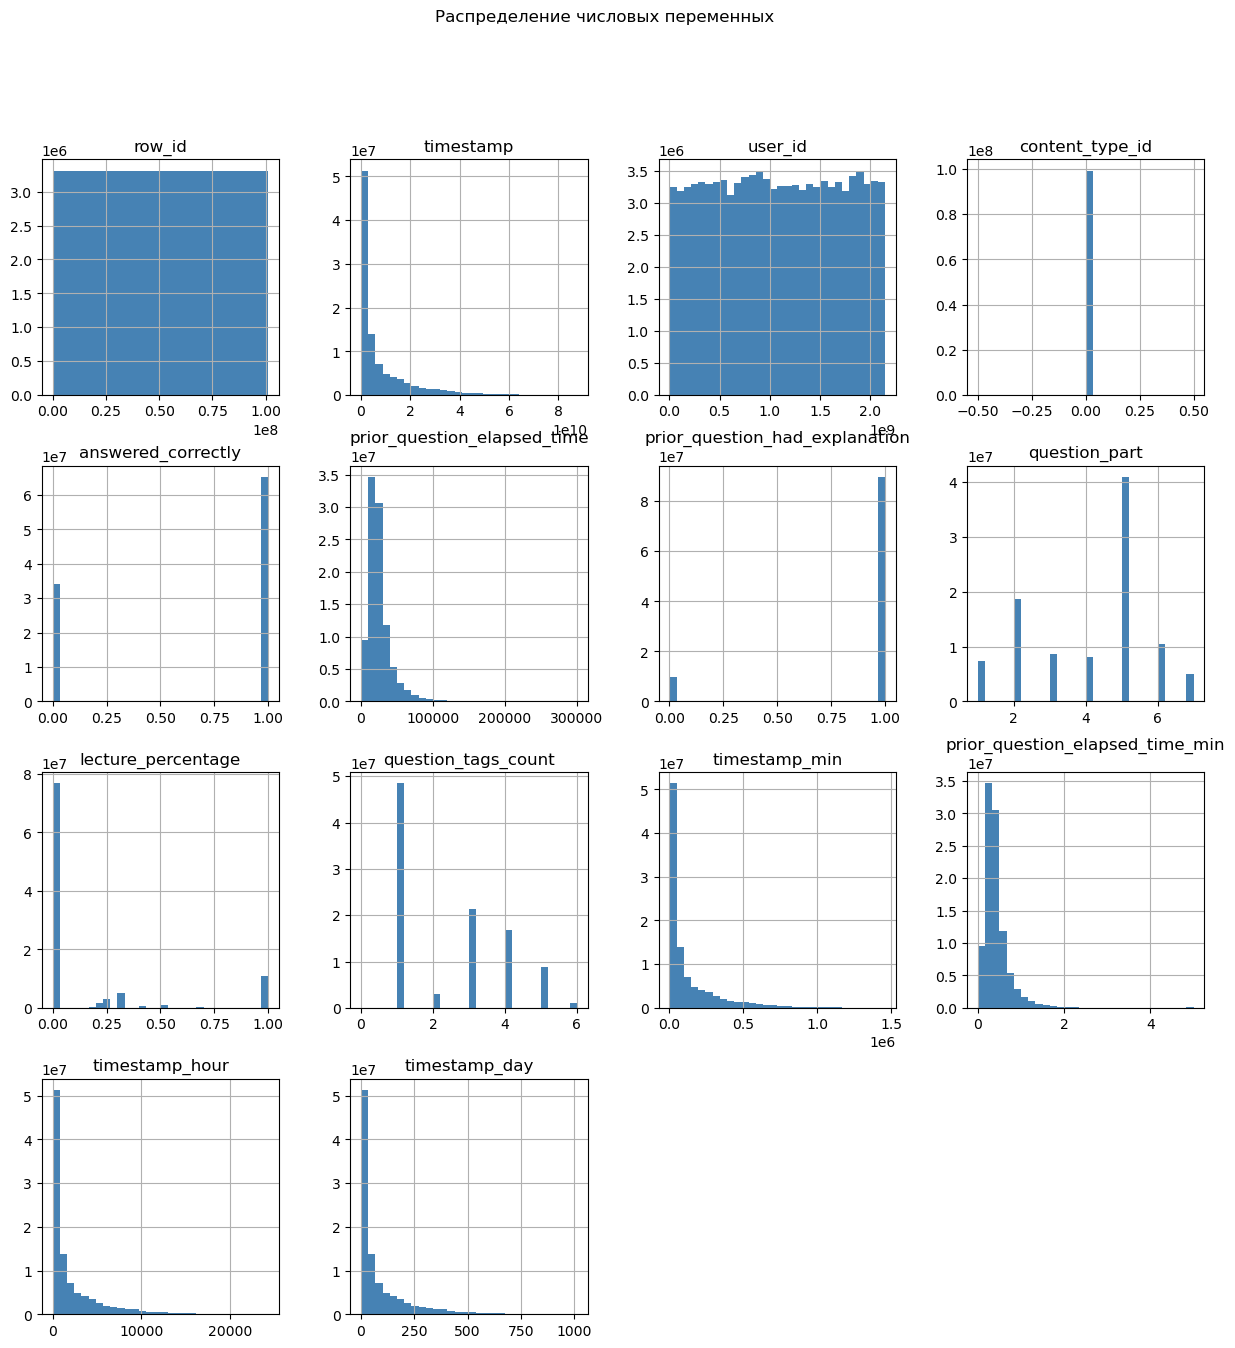

In [53]:
# Проведём анализ распределения каждой числовой переменной.
import matplotlib.pyplot as plt

train.hist(bins=30, figsize=(15, 15), color='steelblue')
plt.suptitle('Распределение числовых переменных')
plt.show()


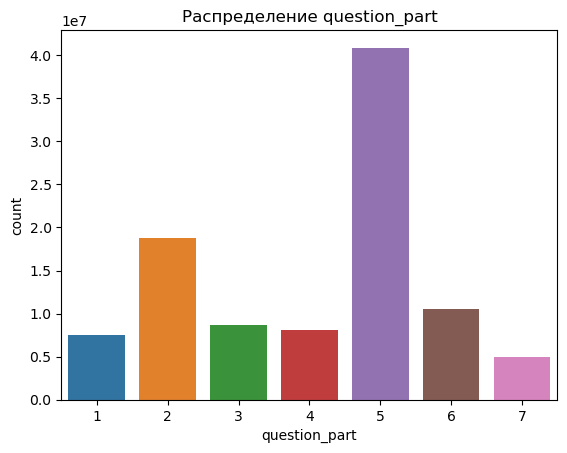

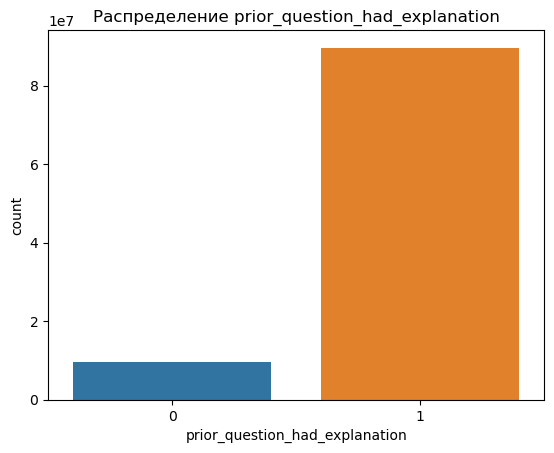

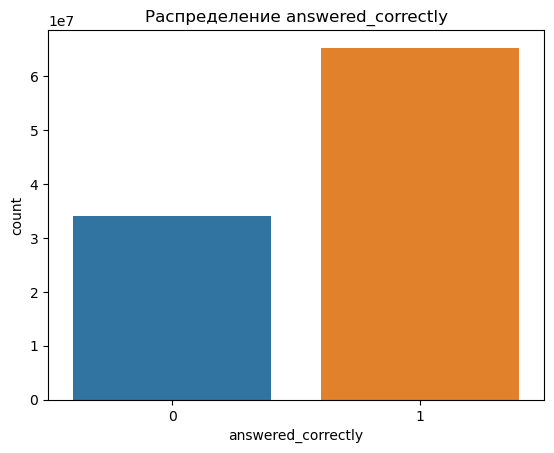

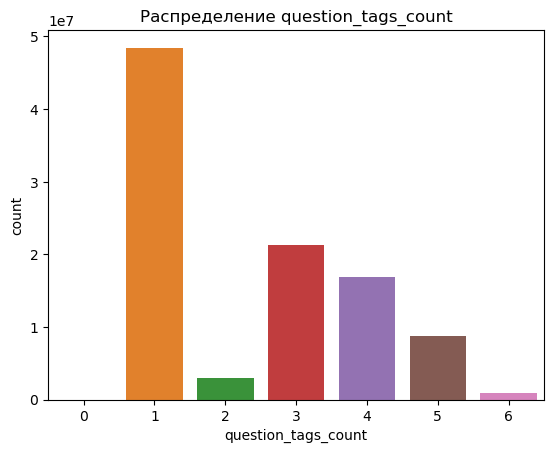

In [55]:
# Проведём анализ распределения каждой категориальной переменной.
import seaborn as sns

for column in ['question_part', 'prior_question_had_explanation', 'answered_correctly', 'question_tags_count']:
    sns.countplot(x=column, data=train)
    plt.title(f'Распределение {column}')
    plt.show()

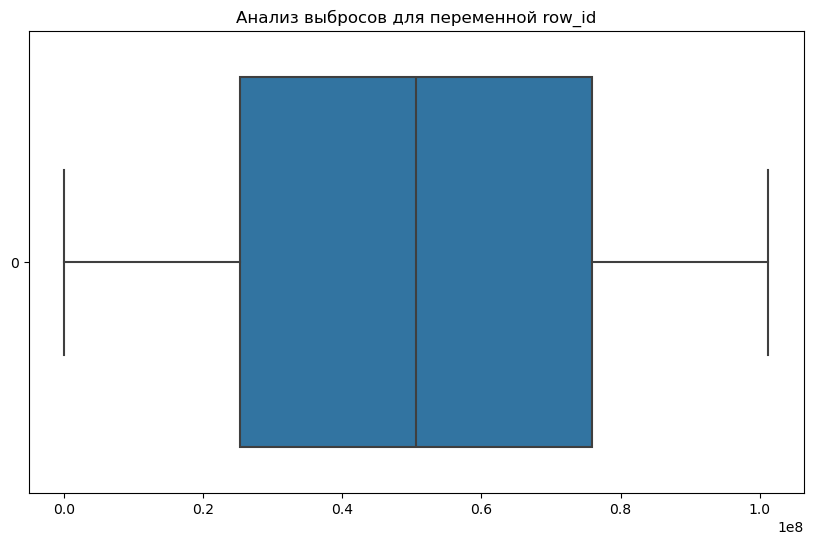

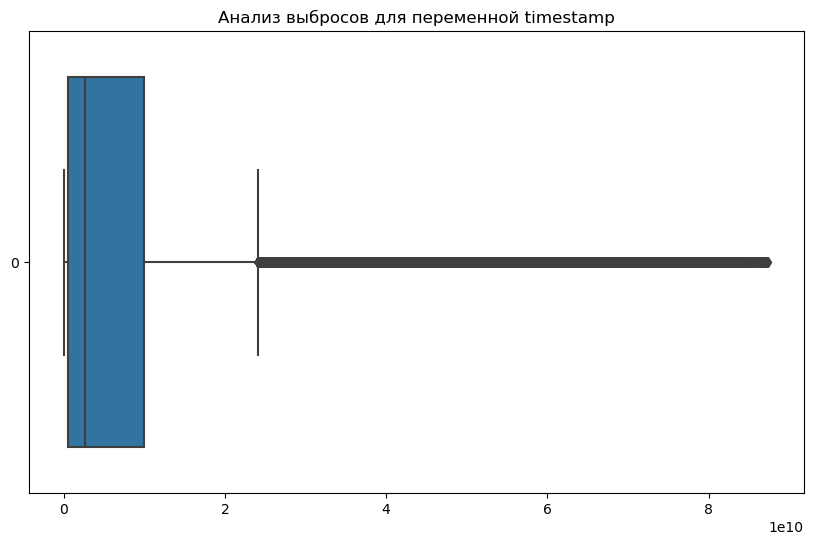

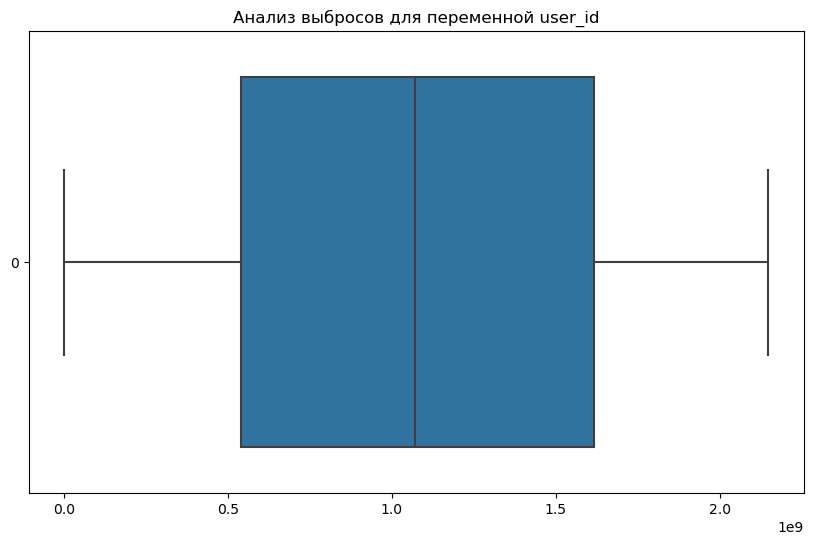

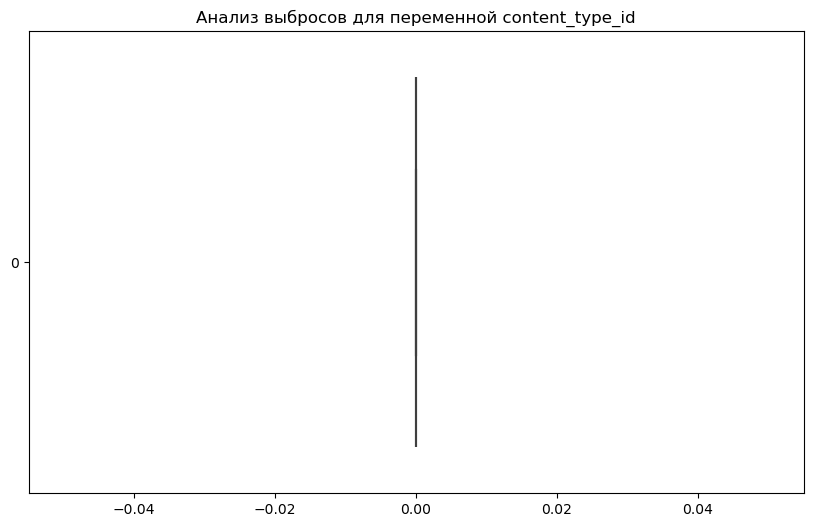

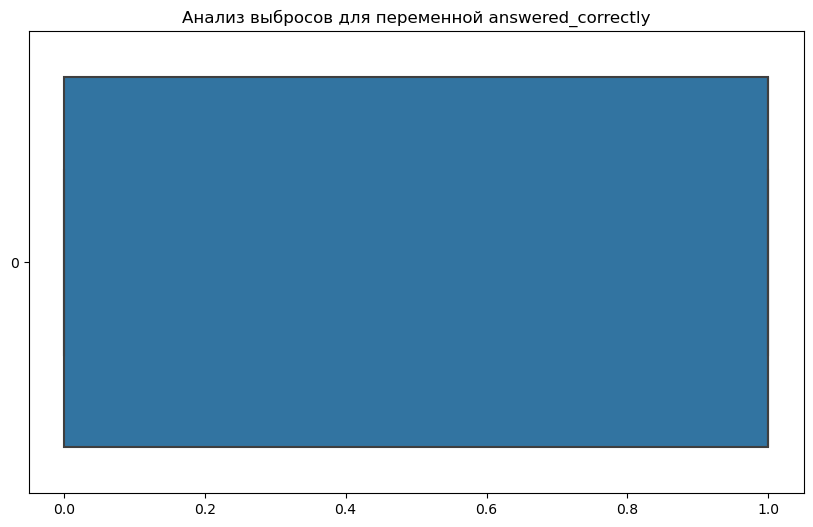

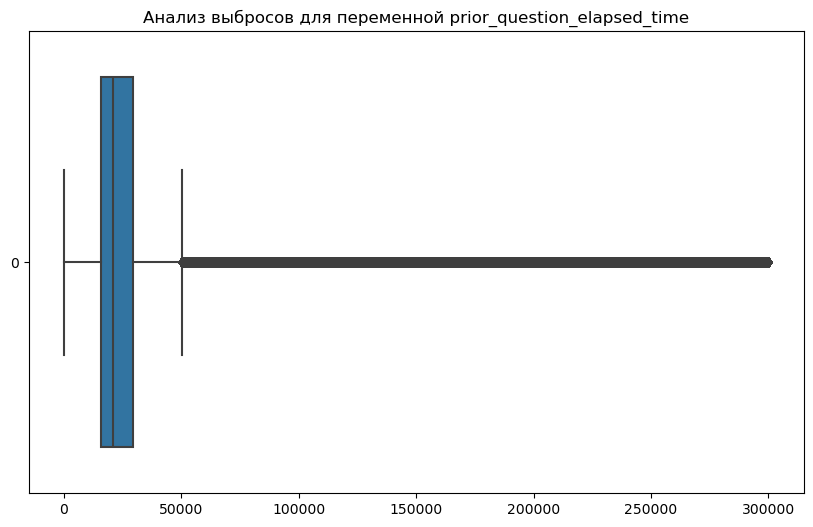

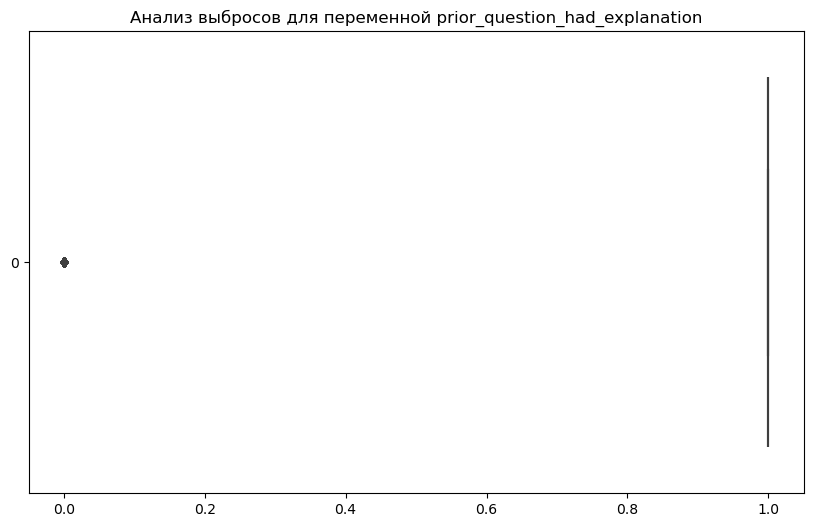

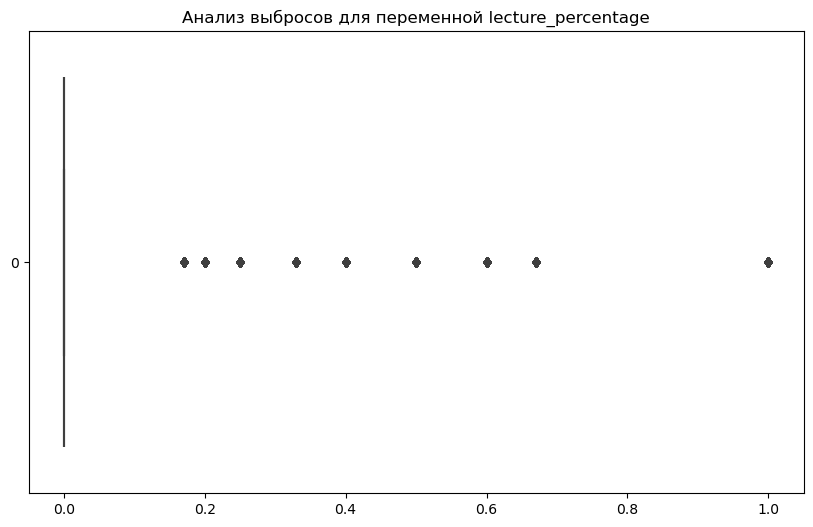

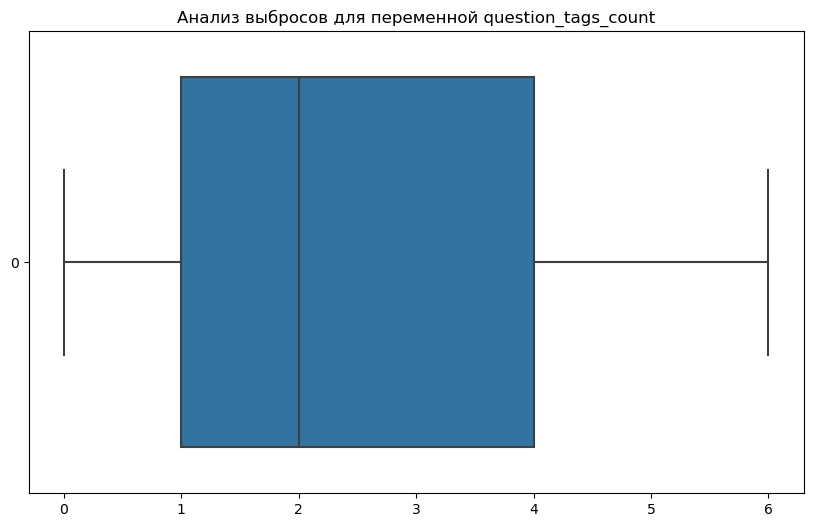

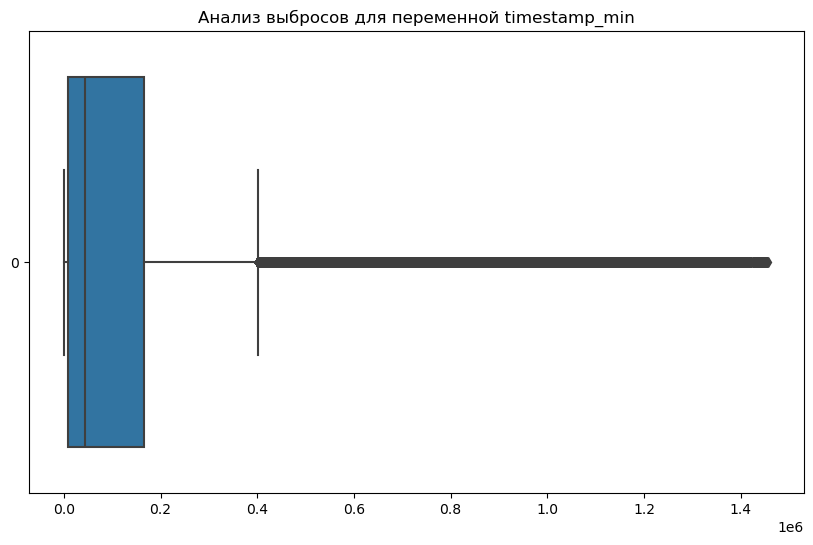

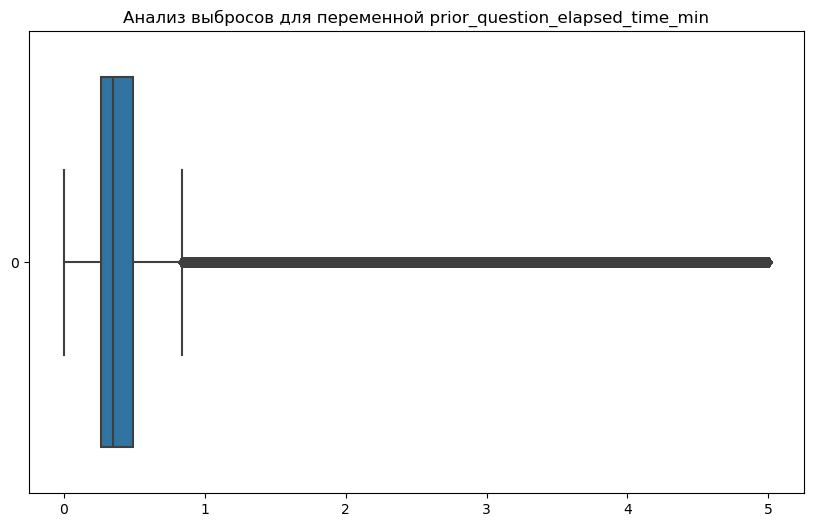

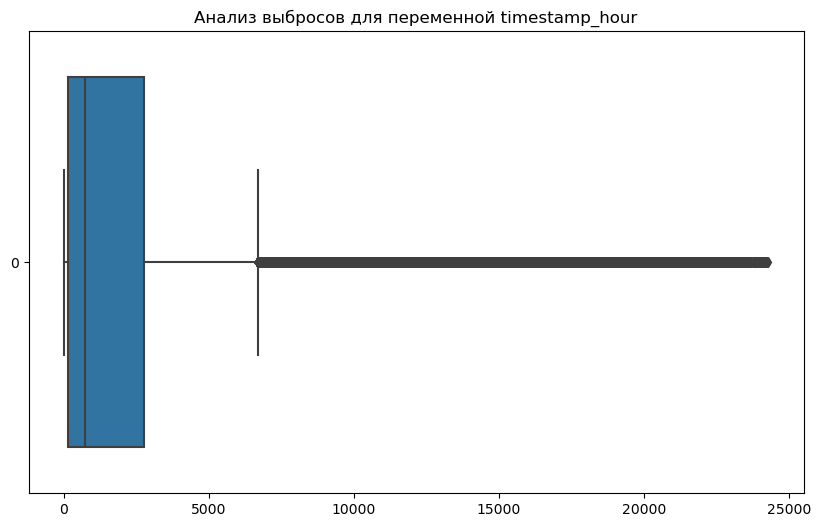

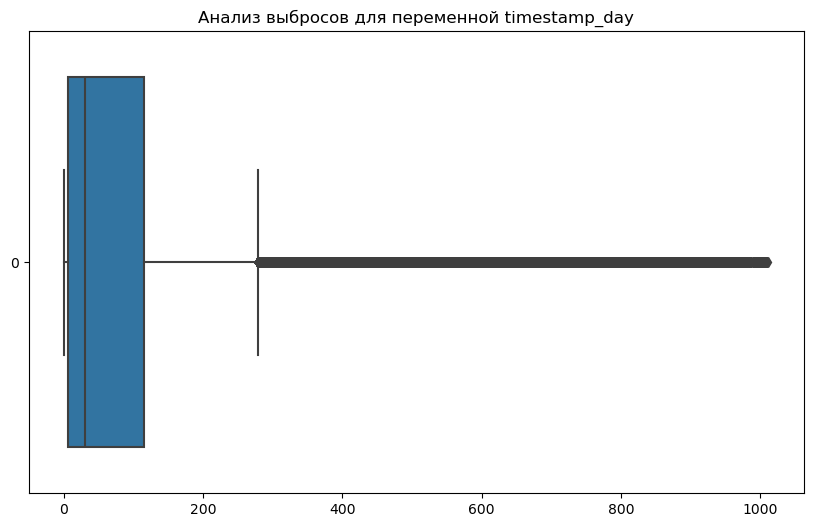

In [56]:
# Проведём анализ выбросов во всех числовых переменных
def analyze_outliers(df):
    # Отбираем только числовые столбцы
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Построение boxplot для каждого числового столбца
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[column], orient='h')
        plt.title(f'Анализ выбросов для переменной {column}')
        plt.show()
        
# Анализ выбросов для всех числовых переменных
analyze_outliers(train)

In [57]:
train.head()

,row_id,timestamp,user_id,content_type_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count,timestamp_min,prior_question_elapsed_time_min,timestamp_hour,timestamp_day
0,0,0,115,0,1,19933.311111,0,5,0.0,1,0.000000,0.332222,0.000000,0.000000
1,1,56943,115,0,1,37000.000000,0,5,0.0,1,0.949050,0.616667,0.015817,0.000659
2,2,118363,115,0,1,55000.000000,0,1,0.0,3,1.972717,0.916667,0.032879,0.001370
3,3,131167,115,0,1,19000.000000,0,1,0.0,3,2.186117,0.316667,0.036435,0.001518
4,4,137965,115,0,1,11000.000000,0,1,0.0,3,2.299417,0.183333,0.038324,0.001597


In [64]:
# Теперь попробуем найти и оценить взаимосвязь между признаками
# Проведём стандартизацию данных перед оценкой их корреляции
from sklearn.preprocessing import StandardScaler

# Выбор только числовых признаков и удаление остальных столбцов
drop_columns = ['row_id', 'timestamp', 'user_id', 'content_type_id', 'prior_question_elapsed_time', 'timestamp_min', 'timestamp_hour']
numeric_cols = (train.select_dtypes(include=['int32', 'int64', 'float64']).drop(columns=drop_columns))

scaler = StandardScaler()
train_scaler = scaler.fit_transform(numeric_cols)

# Преобразуем обратно в DataFrame для удобства
train_df_scaled = pd.DataFrame(train_scaler, columns=numeric_cols.columns)
train_df_scaled.head()

,answered_correctly,prior_question_had_explanation,question_part,lecture_percentage,question_tags_count,prior_question_elapsed_time_min,timestamp_day
0,0.722166,-3.058795,0.548137,-0.46087,-0.924408,-0.275388,-0.664259
1,0.722166,-3.058795,0.548137,-0.46087,-0.924408,0.581580,-0.664254
2,0.722166,-3.058795,-1.844163,-0.46087,0.426093,1.485413,-0.664248
3,0.722166,-3.058795,-1.844163,-0.46087,0.426093,-0.322253,-0.664247
4,0.722166,-3.058795,-1.844163,-0.46087,0.426093,-0.723956,-0.664247


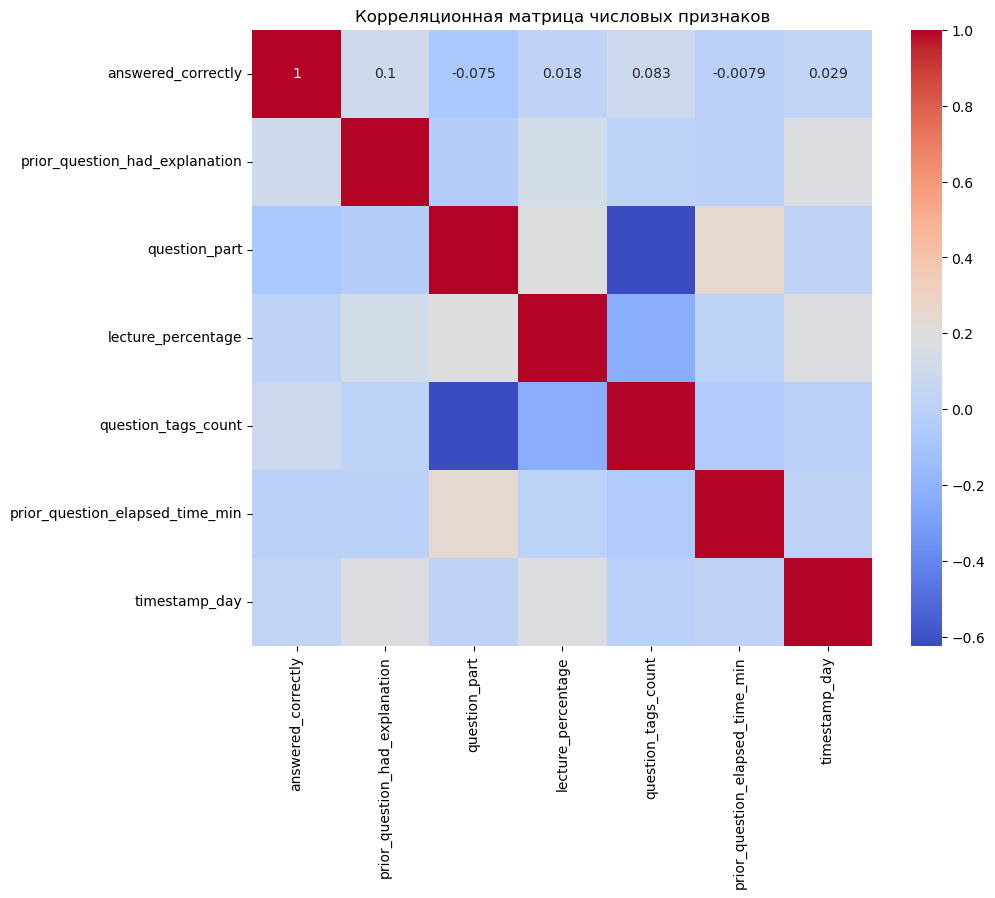

In [65]:
# Корреляционная матрица для числовых признаков
corr_matrix = train_df_scaled.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

In [63]:
# В этой матрице все корреляции очень слабые, что говорит о том, что сильных линейных зависимостей между признаками нет. 
# Самая значительная корреляция наблюдается между признаками prior_question_had_explanation и answered_correctly (0.1), 
# что может указывать на некоторую связь между наличием объяснений на предыдущий вопрос и правильностью ответа, хотя эта связь очень слабая.
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99271213 entries, 0 to 101230331
Data columns (total 14 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   row_id                           int64  
 1   timestamp                        int64  
 2   user_id                          int64  
 3   content_type_id                  int64  
 4   answered_correctly               int64  
 5   prior_question_elapsed_time      float64
 6   prior_question_had_explanation   int64  
 7   question_part                    int32  
 8   lecture_percentage               float64
 9   question_tags_count              int64  
 10  timestamp_min                    float64
 11  prior_question_elapsed_time_min  float64
 12  timestamp_hour                   float64
 13  timestamp_day                    float64
dtypes: float64(6), int32(1), int64(7)
memory usage: 10.7 GB


С учётом располагаемого времени на выполнение текущего домашнего задания, анализ значимых признаков пока завершён.